# KNN Modeling

**Import the necessary packages**

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 150, 'display.max_rows', 150)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

**Read in the data**

In [68]:
df = pd.read_csv('final_df alex.csv')

**Defining our features for our Condom use model and our Alcohol/Drugs before sex model**

In [45]:
# Condom use
features_0 = ['YEAR', 'raceeth', 'How old are you', 'What is your sex',
       'In what grade are you','Seat belt use', 'Riding with a drinking driver',
       'Drinking and driving', 'Weapon carrying', 'Weapon carrying at school',
       'Safety concerns at school', 'Threatened at school',
       'Physical fighting', 'Physical fighting at school',
       'Forced sexual intercourse', 'Bullying at school',
       'Electronic bullying', 'Sad or hopeless', 'Considered suicide',
       'Made a suicide plan', 'Attempted suicide', 'Injurious suicide attempt',
       'Ever cigarette use', 'Initiation of cigarette smoking',
       'Current cigarette use', 'Current smokeless tobacco use',
       'Current cigar use', 'Initiation of alcohol use', 'Current alcohol use',
       'Source of alcohol', 'Ever marijuana use',
       'Initiation of marijuana use', 'Current marijuana use',
       'Ever steroid use', 'Illegal injected drug use',
       'Illegal drugs at school', 'Ever sexual intercourse',
       'Sex before 13 years', 'Multiple sex partners',
       'Current sexual activity', 'Alcohol/drugs and sex',
        'Perception of weight', 'Weight loss',
       'Television watching', 'Computer use', 'HIV testing', 'Asthma', 'Sleep',
       'Ever used LSD',
       'Has used hard drugs', 'healthy_eating', 'regular_activity']
condom_use = df['Condom use']

In [5]:
features_1 = ['YEAR', 'raceeth', 'How old are you', 'What is your sex',
       'In what grade are you',
       'Seat belt use', 'Riding with a drinking driver',
       'Drinking and driving', 'Weapon carrying', 'Weapon carrying at school',
       'Safety concerns at school', 'Threatened at school',
       'Physical fighting', 'Physical fighting at school',
       'Forced sexual intercourse', 'Bullying at school',
       'Electronic bullying', 'Sad or hopeless', 'Considered suicide',
       'Made a suicide plan', 'Attempted suicide', 'Injurious suicide attempt',
       'Ever cigarette use', 'Initiation of cigarette smoking',
       'Current cigarette use', 'Current smokeless tobacco use',
       'Current cigar use', 'Initiation of alcohol use', 'Current alcohol use',
       'Source of alcohol', 'Ever marijuana use',
       'Initiation of marijuana use', 'Current marijuana use',
       'Ever steroid use', 'Illegal injected drug use',
       'Illegal drugs at school', 'Ever sexual intercourse',
       'Sex before 13 years', 'Multiple sex partners',
       'Current sexual activity', 'Condom use','Birth control pill use', 
        'Perception of weight', 'Weight loss',
       'Television watching', 'Computer use', 'HIV testing', 'Asthma', 'Sleep',
       'Ever used LSD',
       'Has used hard drugs', 'healthy_eating', 'regular_activity']
alc_and_sex = df['Alcohol/drugs and sex']

**Dummy vars**

In [6]:
#Turn all features into object types
features_0 = df[features_0].astype('object')
features_1 = df[features_1].astype('object')

In [7]:
dummies_0 = pd.get_dummies(features_0,drop_first=False)
dummies_1 = pd.get_dummies(features_1,drop_first=False)

**Let's take a look to see if there is a class imbalance amongst our two seperate target variables**

**Condom use**

In [6]:
print('Raw counts: \n')
print(condom_use.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(condom_use.value_counts(normalize=True))

Raw counts: 

1.0    30252
2.0    14095
3.0     9201
Name: Condom use, dtype: int64
-----------------------------------
Normalized counts: 

1.0    0.564951
2.0    0.263222
3.0    0.171827
Name: Condom use, dtype: float64


**Alcohol/drugs and sex**

In [43]:
print('Raw counts: \n')
print(alc_and_sex.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(alc_and_sex.value_counts(normalize=True))

Raw counts: 

1.0    30252
3.0    18811
2.0     4485
Name: Alcohol/drugs and sex, dtype: int64
-----------------------------------
Normalized counts: 

1.0    0.564951
3.0    0.351292
2.0    0.083757
Name: Alcohol/drugs and sex, dtype: float64


## Modifying class imbalance amongst our target variables

**Using SMOTE on condom use**

In [10]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(df[features_0], condom_use, test_size=0.25, random_state=1)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_0, y_train_0) 

In [11]:
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Synthetic sample class distribution: 

1.0    22727
2.0    22727
3.0    22727
Name: Condom use, dtype: int64


**Using SMOTE on alcohol/drugs with sex**

In [11]:
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(dummies_1, alc_and_sex, test_size=0.25, random_state=1)
# smote = SMOTE()
# X_train_resampled, y_train_resampled = smote.fit_sample(X_train_1, y_train_1) 

In [12]:
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Synthetic sample class distribution: 

1.0    22727
2.0    22727
3.0    22727
Name: Condom use, dtype: int64


## KNN with Condom Use as the dependant variable

**Instantiate the KNN model**

In [13]:
knn = KNeighborsClassifier(n_neighbors=1, p = 2)

In [14]:
knn.fit(dummies_0,condom_use)

KNeighborsClassifier(n_neighbors=1)

**Train test split**

In [18]:
scaler = StandardScaler()  
scaler.fit(X_train_0)

X_train_0 = scaler.transform(X_train_0)  
X_test_0 = scaler.transform(X_test_0)  


model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_0, y_train_0)

y_predict_test = model.predict(X_test_0)
y_predict_train = model.predict(X_train_0)

In [19]:
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score(y_test_0, y_predict_test, average='weighted')
f1_score(y_train_0, y_predict_train, average='weighted')

0.8282515684911542

In [21]:
from sklearn import metrics

print('Accuracy test:', metrics.accuracy_score(y_test_0, y_predict_test))
print('Accuracy train:', metrics.accuracy_score(y_train_0, y_predict_train))

Accuracy test: 0.7808321505938597
Accuracy train: 0.8448245810612286


In [24]:
cm = confusion_matrix(y_test, y_predict_0)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

NameError: name 'y_test' is not defined

## KNN with Alc and sex as dependant variable

**Fitting the model**

In [17]:
knn = KNeighborsClassifier(n_neighbors=1, p = 2)

In [18]:
knn.fit(dummies_1,alc_and_sex)

KNeighborsClassifier(n_neighbors=1)

In [19]:
scaler = StandardScaler()  
scaler.fit(X_train_1)

X_train_1 = scaler.transform(X_train_1)  
X_test_1 = scaler.transform(X_test_1)  


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_1, y_train_1)

y_predict_test = model.predict(X_test_1)
y_predict_train = model.predict(X_train_1)

In [20]:
# F1 = 2 * (precision * recall) / (precision + recall)

print('F1 score test: ',f1_score(y_test_1, y_predict_test, average='weighted'))
print('F1 score train: ', f1_score(y_test_1, y_predict_train, average='weighted'))

0.8582956548558817

In [42]:
print('Accuracy test:', metrics.accuracy_score(y_test_1, y_predict_test))
print('Accuracy train:', metrics.accuracy_score(y_train_1, y_predict_train))

Accuracy: 0.8708448494808396


[[7499    8   18]
 [ 145  242  685]
 [ 524  349 3917]]


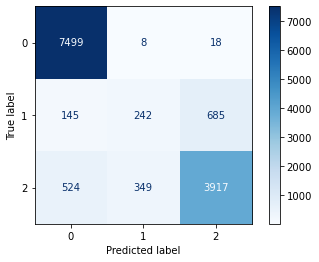

In [43]:
cm = confusion_matrix(y_test_1, y_predict_1 )
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [44]:
df['Alcohol/drugs and sex'].value_counts()

1.0    30252
3.0    18811
2.0     4485
Name: Alcohol/drugs and sex, dtype: int64

# Decision Tree 

In [9]:
import sklearn.metrics as metrics

**Decsion Tree for Condom use**

In [10]:
features_0 = ['YEAR', 'raceeth', 'How old are you', 'What is your sex',
       'In what grade are you','Seat belt use', 'Riding with a drinking driver',
       'Drinking and driving', 'Weapon carrying', 'Weapon carrying at school',
       'Safety concerns at school', 'Threatened at school',
       'Physical fighting', 'Physical fighting at school',
       'Forced sexual intercourse', 'Bullying at school',
       'Electronic bullying', 'Sad or hopeless', 'Considered suicide',
       'Made a suicide plan', 'Attempted suicide', 'Injurious suicide attempt',
       'Ever cigarette use', 'Initiation of cigarette smoking',
       'Current cigarette use', 'Current smokeless tobacco use',
       'Current cigar use', 'Initiation of alcohol use', 'Current alcohol use',
       'Source of alcohol', 'Ever marijuana use',
       'Initiation of marijuana use', 'Current marijuana use',
       'Ever steroid use', 'Illegal injected drug use',
       'Illegal drugs at school', 'Ever sexual intercourse',
       'Sex before 13 years', 'Multiple sex partners',
       'Current sexual activity', 'Alcohol/drugs and sex','Birth control pill use', 
        'Perception of weight', 'Weight loss',
       'Television watching', 'Computer use', 'HIV testing', 'Asthma', 'Sleep',
       'Ever used LSD',
       'Has used hard drugs', 'healthy_eating', 'regular_activity']
condom_use = df['Condom use']

In [11]:
len(features_0)

53

In [13]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df[features_0], condom_use, test_size=0.25, random_state=1)
smote = SMOTE()
X_train_2, y_train_2 = smote.fit_sample(X_train_2, y_train_2) 


In [14]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dtc.fit(X_train_2, y_train_2)
dtc_preds_test  = dtc.predict(X_test_2)
dtc_preds_train  = dtc.predict(X_train_2)
dtc_f1_test = metrics.f1_score(y_test_2, dtc_preds_test,average = 'weighted')
dtc_f1_train = metrics.f1_score(y_train_2, dtc_preds_train,average = 'weighted')
print('F1 score test: ',dtc_f1_test)
print('F1 score train: ',dtc_f1_train)

0.9529795994758548


In [15]:
print('Accuracy test:', metrics.accuracy_score(y_test_2, dtc_preds_test))
print('Accuracy train:', metrics.accuracy_score(y_train_2, dtc_preds_train))

Accuracy: 0.9524165234929409


[[7525    0    0]
 [   0 2985  587]
 [   0   50 2240]]


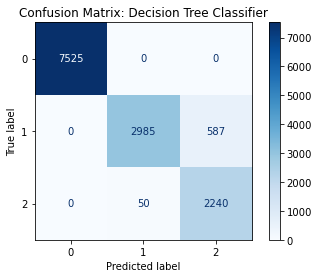

In [25]:
cm = confusion_matrix(y_test_2, dtc_preds_0 )
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Decision Tree Classifier')
plt.show()

In [30]:
print(classification_report(y_test_2, dtc_preds_0))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      7525
         2.0       0.98      0.84      0.90      3572
         3.0       0.79      0.98      0.88      2290

    accuracy                           0.95     13387
   macro avg       0.93      0.94      0.93     13387
weighted avg       0.96      0.95      0.95     13387



In [26]:
# Feature importance
dtc.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00034270e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.40380277e-03,
       5.71922022e-01, 4.24356821e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.88963773e-04, 0.00000000e+00,
       0.00000000e+00, 1.37284536e-04, 0.00000000e+00, 0.00000000e+00,
       1.91071833e-04])

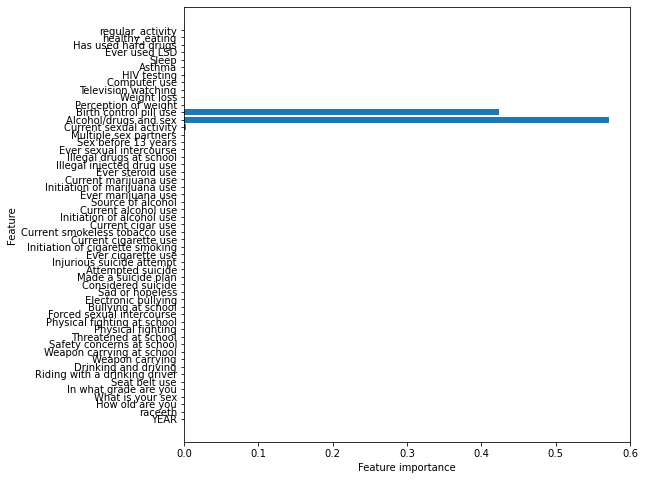

In [29]:
def plot_feature_importances(model):
    n_features = X_train_2.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_2.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances(dtc)

**Decsion Tree for Alcohol/drugs and sex**

In [36]:
features_1 = ['YEAR', 'raceeth', 'How old are you', 'What is your sex',
       'In what grade are you',
       'Seat belt use', 'Riding with a drinking driver',
       'Drinking and driving', 'Weapon carrying', 'Weapon carrying at school',
       'Safety concerns at school', 'Threatened at school',
       'Physical fighting', 'Physical fighting at school',
       'Forced sexual intercourse', 'Bullying at school',
       'Electronic bullying', 'Sad or hopeless', 'Considered suicide',
       'Made a suicide plan', 'Attempted suicide', 'Injurious suicide attempt',
       'Ever cigarette use', 'Initiation of cigarette smoking',
       'Current cigarette use', 'Current smokeless tobacco use',
       'Current cigar use', 'Initiation of alcohol use', 'Current alcohol use',
       'Source of alcohol', 'Ever marijuana use',
       'Initiation of marijuana use', 'Current marijuana use',
       'Ever steroid use', 'Illegal injected drug use',
       'Illegal drugs at school', 'Ever sexual intercourse',
       'Sex before 13 years', 'Multiple sex partners',
       'Current sexual activity', 'Condom use','Birth control pill use', 
        'Perception of weight', 'Weight loss',
       'Television watching', 'Computer use', 'HIV testing', 'Asthma', 'Sleep',
       'Ever used LSD',
       'Has used hard drugs', 'healthy_eating', 'regular_activity']
alc_and_sex = df['Alcohol/drugs and sex']

In [37]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df[features_1], alc_and_sex, test_size=0.25, random_state=1)
X_train_3, y_train_3 = smote.fit_sample(X_train_3, y_train_3) 


In [38]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dtc.fit(X_train_3, y_train_3)
dtc_preds_0  = dtc.predict(X_test_3)
dtc_f1 = metrics.f1_score(y_test_3, dtc_preds_0,average = 'weighted')
print(dtc_f1)

0.9025555564948794


In [39]:
print('Accuracy:', metrics.accuracy_score(y_test_2, dtc_preds_0))

Accuracy: 0.7443788750280123


# Instantiate the classifier using 100 trees

**Condom use**

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1, n_estimators=100)

In [19]:
#fit the model to the training data
rfc.fit(X_train_2, y_train_2)

RandomForestClassifier(random_state=1)

In [20]:
#use the fitted model to predict on the test data
rfc_preds_test = rfc.predict(X_test_2)
rfc_preds_train = rfc.predict(X_train_2)
rfc_f1_test = metrics.f1_score(y_test_2, rfc_preds_test,average = 'weighted')
rfc_f1_train = metrics.f1_score(y_train_2, rfc_preds_train,average = 'weighted')
rfc_acc_test = metrics.accuracy_score(y_test_2, rfc_preds_test)
rfc_acc_train = metrics.accuracy_score(y_train_2, rfc_preds_train)
# checking accuracy on the test data
print('Test F1 score test: ', rfc_f1_test)
print('Test Accuracy score test: ', rfc_acc_test)

print('Test F1 score test train: ', rfc_f1_train)
print('Test Accuracy score train: ', rfc_acc_train)

Test F1 score:  0.9512280992783727
Test Accuracy score:  0.9506984387838948


[[7525    0    0]
 [   0 3033  539]
 [   0  121 2169]]


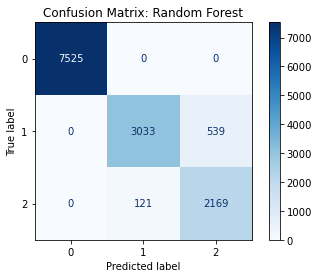

In [24]:
cm = confusion_matrix(y_test_2, rfc_preds )
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix

labels = ['business', 'health']
cm = confusion_matrix(y_test_2, rfc_preds, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/Users/alexandrabruno/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=['business', 'health'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/alexandrabruno/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:289: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

[[7525    0    0]
 [   0 3043  529]
 [   0  123 2167]]


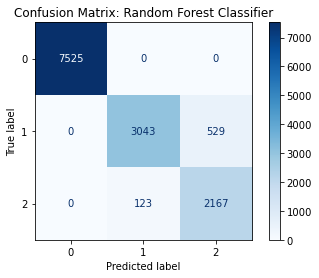

In [59]:
cm = confusion_matrix(y_test_0, rfc_preds)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
# Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# Binarize the output
y = label_binarize(condom_use, classes=[0, 1, 2])
n_classes = y.shape[1]
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

**Alcohol/drugs and drugs**

In [ ]:
#fit the model to the training data
rfc.fit(X_train_1, y_train_1)

In [49]:
#use the fitted model to predict on the test data
rfc_preds = rfc.predict(X_test_1)
rfc_f1 = metrics.f1_score(y_test_1, rfc_preds,average = 'weighted')
rfc_acc = metrics.accuracy_score(y_test_1, rfc_preds)
# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)
print('Test Accuracy score: ', rfc_acc)

Test F1 score:  0.780572003268747
Test Accuracy score:  0.7541644879360574


[[7525    0    0]
 [   0  469  603]
 [   0 2688 2102]]


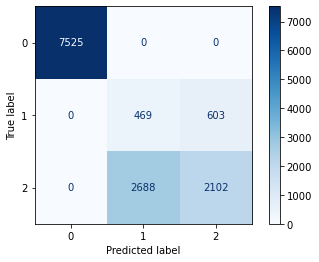

In [50]:
cm = confusion_matrix(y_test_1, rfc_preds)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

We can split the data using stratify to make sure we can get an even split of classes in the train and test set

In [8]:
# Split X and y with even class distributions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

# Random Forest

In [57]:
#Import modules
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [58]:
#Split X and y 
X = df[features_0]
y = condom_use

In [59]:
#Train Test Split and Standard Scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [60]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())
print('--------------------')
print(pd.Series(y_train_resampled).value_counts(normalize=True))

Synthetic sample class distribution: 

1.0    22727
2.0    22727
3.0    22727
Name: Condom use, dtype: int64
--------------------
1.0    0.333333
2.0    0.333333
3.0    0.333333
Name: Condom use, dtype: float64


In [61]:
#Instantiate model
rfc = RandomForestClassifier(random_state=42, max_depth=5)

In [62]:
#fit the model to the training data
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, random_state=42)

In [63]:
#use the fitted model to predict on the test data
rfc_preds_test = rfc.predict(X_test)
rfc_preds_train = rfc.predict(X_train)
rfc_f1_test = metrics.f1_score(y_test, rfc_preds_test,average = 'weighted')
rfc_f1_train = metrics.f1_score(y_train, rfc_preds_train,average = 'weighted')
rfc_acc_test = metrics.accuracy_score(y_test, rfc_preds_test)
rfc_acc_train = metrics.accuracy_score(y_train, rfc_preds_train)
# checking accuracy on the test data
print('Test F1 score test: ', rfc_f1_test)
print('Test Accuracy score test: ', rfc_acc_test)

print('Test F1 score train: ', rfc_f1_train)
print('Test Accuracy score train: ', rfc_acc_train)

Test F1 score test:  0.8367003475051207
Test Accuracy score test:  0.839022932695899
Test F1 score train:  0.8426840983877955
Test Accuracy score train:  0.8445755832773089


In [64]:
#Now with cross validation search
val = cross_val_score(RandomForestClassifier(random_state=42),X_train_resampled, y_train_resampled,cv=5)
val.mean()

0.9140239658670236

In [65]:
rfc.score(X_test, y_test)

0.839022932695899

[[7525    0    0]
 [   0 2640  932]
 [   1 1222 1067]]


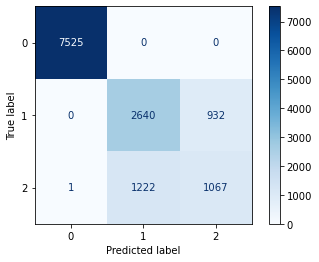

In [66]:
cm = confusion_matrix(y_test, rfc_preds_test)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [69]:
rfc.feature_importances_

array([8.04702418e-04, 1.85882455e-04, 7.36362168e-03, 8.08970415e-03,
       3.29767927e-03, 2.74877083e-03, 2.09206872e-04, 9.13753860e-04,
       8.16576397e-05, 1.28835153e-04, 2.48306806e-05, 9.55821245e-05,
       1.11339780e-03, 6.40317203e-05, 3.68296587e-03, 1.04357607e-04,
       1.18063372e-04, 1.52052084e-03, 2.27439994e-03, 9.61426789e-04,
       6.55929636e-04, 7.34792537e-04, 3.90422656e-03, 4.02081475e-03,
       1.06527236e-03, 6.25212734e-05, 1.19105159e-04, 2.34067525e-02,
       6.19813948e-03, 1.43899758e-03, 1.60211343e-02, 2.27342435e-02,
       8.89257544e-03, 2.35955713e-04, 2.24821162e-04, 1.35964611e-04,
       1.46328756e-01, 1.84579178e-01, 1.09535424e-01, 1.92183903e-01,
       2.34697811e-01, 4.01697664e-04, 2.70354764e-04, 8.25697210e-05,
       2.97691962e-04, 2.44736666e-03, 1.71135218e-05, 1.01407949e-03,
       1.11266649e-03, 1.96330406e-03, 1.47635414e-05, 1.41868232e-03])

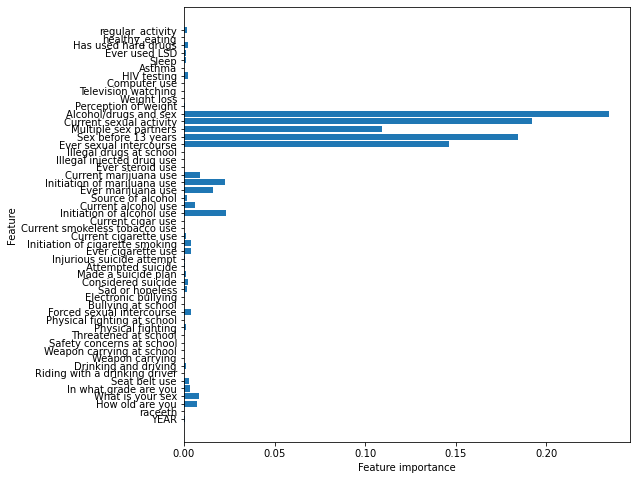

In [79]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_importances(rfc)

# Random Forest with Grid Search

In [13]:
#If you were to line up all the possible values of one and of the other, they create a grid

In [14]:
rf_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4],
    "max_features": [None,4,5,6,9,10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf" : [1, 2, 3, 5, 6],
    "n_estimators" : [10, 30, 100]
}

In [15]:
rf_grid = RandomForestClassifier(random_state=42)
gridsearch = GridSearchCV(rf_grid, rf_param_grid, cv=5, return_train_score=True, n_jobs=-1, verbose=-1)

In [16]:
gridsearch.fit(X_train_resampled, y_train_resampled)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 8704 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 12160 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 14104 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 16192 tasks   

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16],
                         'max_features': [None, 4, 5, 6, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 30, 100]},
             return_train_score=True, verbose=-1)

In [17]:
print("Testing Accuracy: {:.4}%".format(gridsearch.best_score_ * 100))
print("")
print("Optimal Parameters: {}".format(gridsearch.best_params_))

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best Model: {}".format(gridsearch.best_estimator_))

Testing Accuracy: 84.11%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 10}
Best Model: RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=10, random_state=42)


In [18]:
gridsearch.score(X_test, y_test)

0.8089887640449438